In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize as so
data = (np.loadtxt('ex10_data.csv', delimiter=',').T)[1,:]
n = len(data)

**Exercise 1**

a)

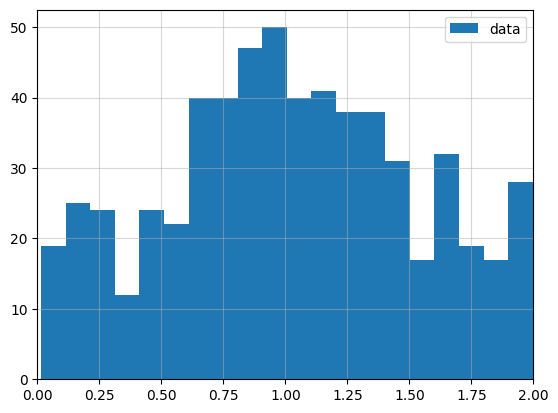

In [2]:
plt.hist(data, bins = 20, fill = True, label = "data")
plt.legend(); plt.grid(alpha = 0.5)
plt.xlim(0, 2)
plt.show()

b)

$$\ln L(v_S,v_B)=-(v_S+v_B)+\sum_{i=1}^n\ln\big((v_S+v_B)f(x_i; v_S, v_B)\big)$$

In [6]:
def f_S(x):
    return 4/(math.erf(2*np.sqrt(2))*np.sqrt(2*np.pi)) * np.exp(-8*(x-1)**2)

def f(x, v_S, v_B):
    return v_S/(v_S+v_B) * f_S(x) + v_B/(v_S+v_B) * 1/2

def ln_L(v_S, v_B):
    return -(v_S+v_B) + n*np.log(v_S+v_B) + sum([np.log(f(x, v_S, v_B)) for x in data])

c)

In [14]:
v_B = 420.7

res = so.minimize(lambda v: -ln_L(v, v_B), [1]) #, bounds = [(1, None), (1e-10, None)]
#print(res)

v_S = res.x[0]
print("v_S =", v_S)

v_S = 179.3046612749707


d)

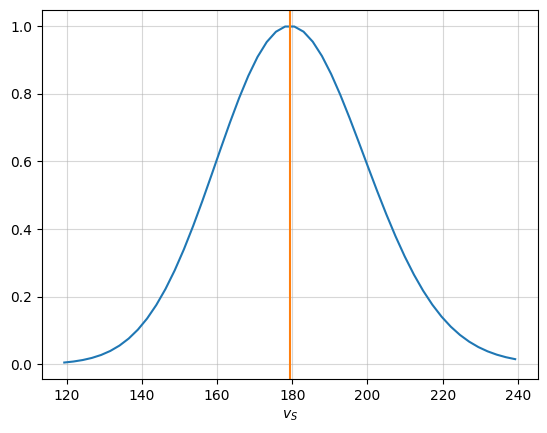

In [34]:
v = np.linspace(v_S-60, v_S+60, 50)
l = lambda x: np.exp(ln_L(x, v_B) - ln_L(v_S, v_B))

plt.plot(v, l(v))
plt.axvline(v_S, color = "tab:orange")
plt.grid(alpha = 0.5); plt.xlabel("$v_S$")
plt.show()

e)

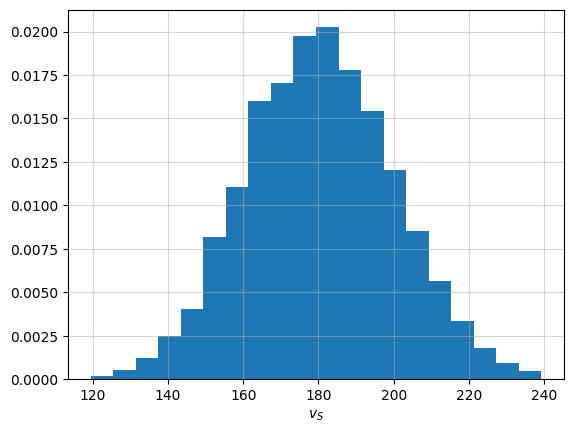

In [35]:
N = 10000
v = np.random.uniform(v_S-60, v_S+60, N)

plt.hist(v, bins = 20, weights = l(v), fill = True, density = True)
plt.grid(alpha = 0.5); plt.xlabel("$v_S$")
plt.show()

Since $\exp(\ln L(v_S)-\ln L_\text{max})\propto L(v_S)/L_\text{max}$, this corresponds to the probability for a value $v_S$ given the data.